In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd  

plt.rcParams['font.sans-serif'] = ['SimHei', 'Arial Unicode MS', 'WenQuanYi Zen Hei']  # 中文显示
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

In [23]:
file_path = '景点清洗后数据.xlsx'
price_column_name = 'free'
free_indicator = True
high_score_free = 79
print(f"{price_column_name}列的数据类型：{df[price_column_name].dtype}")



free列的数据类型：bool


In [20]:
try:
    df = pd.read_excel(file_path, engine='openpyxl')
    total_attractions = len(df)
    free_attractions_count = len(df[df[price_column_name] == free_indicator])
    paid_attractions_count = total_attractions - free_attractions_count

    print(f"数据读取成功！总景点: {total_attractions}, 免费景点: {free_attractions_count}")

except FileNotFoundError:
    print(f"错误：文件 '{file_path}' 未找到。请检查路径。")
    exit() # 如果文件读取失败，则停止运行
except KeyError:
    print(f"错误：列名 '{price_column_name}' 不存在。请检查列名。")
    exit()

数据读取成功！总景点: 3000, 免费景点: 654


In [24]:
plt.rcParams['font.sans-serif'] = ['SimHei'] 
plt.rcParams['axes.unicode_minus'] = False 

In [25]:
# 中文显示配置（根据系统选择，优先尝试以下字体）
plt.rcParams["font.family"] = [ "Heiti TC", "PingFang SC"]
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

findfont: Font family 'PingFang SC' not found.
findfont: Font family 'PingFang SC' not found.
findfont: Font family 'PingFang SC' not found.
findfont: Font family 'PingFang SC' not found.
findfont: Font family 'PingFang SC' not found.
findfont: Font family 'PingFang SC' not found.
findfont: Font family 'PingFang SC' not found.
findfont: Font family 'PingFang SC' not found.
findfont: Font family 'PingFang SC' not found.
findfont: Font family 'PingFang SC' not found.
findfont: Font family 'PingFang SC' not found.
findfont: Font family 'PingFang SC' not found.
findfont: Font family 'PingFang SC' not found.
findfont: Font family 'PingFang SC' not found.
findfont: Font family 'PingFang SC' not found.
findfont: Font family 'PingFang SC' not found.
findfont: Font family 'PingFang SC' not found.
findfont: Font family 'PingFang SC' not found.
findfont: Font family 'PingFang SC' not found.
findfont: Font family 'PingFang SC' not found.
findfont: Font family 'PingFang SC' not found.
findfont: Fon

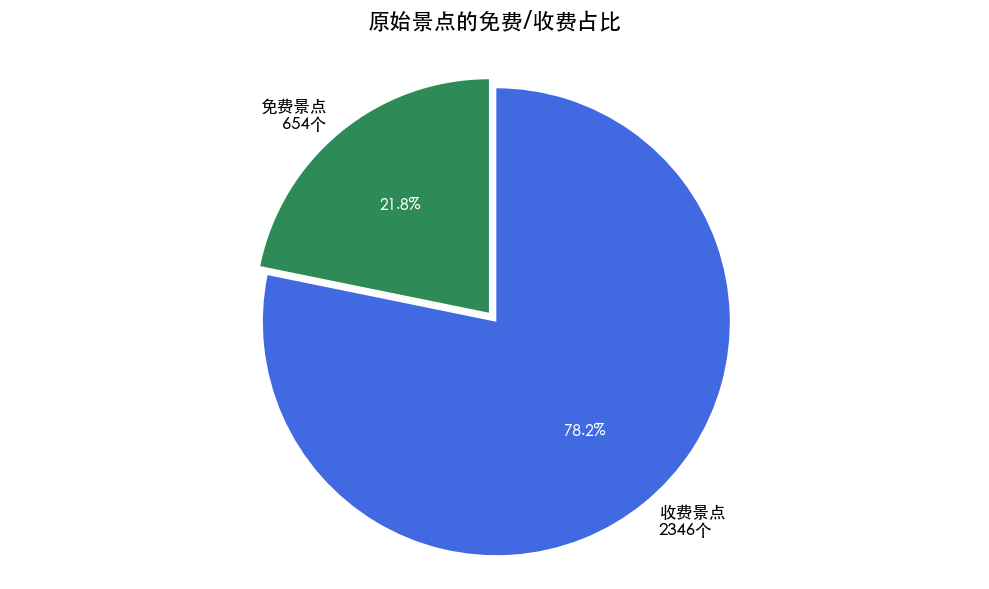

In [26]:
plt.figure(figsize=(10, 6))
labels = [f'免费景点\n{free_attractions_count}个', f'收费景点\n{paid_attractions_count}个']
sizes = [free_attractions_count, paid_attractions_count]
colors_pie = ['#2E8B57', '#4169E1']
explode = (0.05, 0)

wedges, texts, autotexts = plt.pie(sizes, labels=labels, colors=colors_pie, explode=explode,
                                   autopct='%1.1f%%', startangle=90,
                                   textprops={'fontsize': 12, 'fontweight': 'bold'})
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontsize(11)

plt.title('原始景点的免费/收费占比', fontsize=16, fontweight='bold', pad=20)
plt.axis('equal')
plt.tight_layout()
plt.savefig('景点免费收费占比饼图.png', dpi=300, bbox_inches='tight')
plt.show()

findfont: Font family 'PingFang SC' not found.
findfont: Font family 'PingFang SC' not found.
findfont: Font family 'PingFang SC' not found.
findfont: Font family 'PingFang SC' not found.
findfont: Font family 'PingFang SC' not found.
findfont: Font family 'PingFang SC' not found.
findfont: Font family 'PingFang SC' not found.
findfont: Font family 'PingFang SC' not found.
findfont: Font family 'PingFang SC' not found.
findfont: Font family 'PingFang SC' not found.
findfont: Font family 'PingFang SC' not found.
findfont: Font family 'PingFang SC' not found.
findfont: Font family 'PingFang SC' not found.
findfont: Font family 'PingFang SC' not found.
findfont: Font family 'PingFang SC' not found.
findfont: Font family 'PingFang SC' not found.
findfont: Font family 'PingFang SC' not found.
findfont: Font family 'PingFang SC' not found.
findfont: Font family 'PingFang SC' not found.
findfont: Font family 'PingFang SC' not found.
findfont: Font family 'PingFang SC' not found.
findfont: Fon

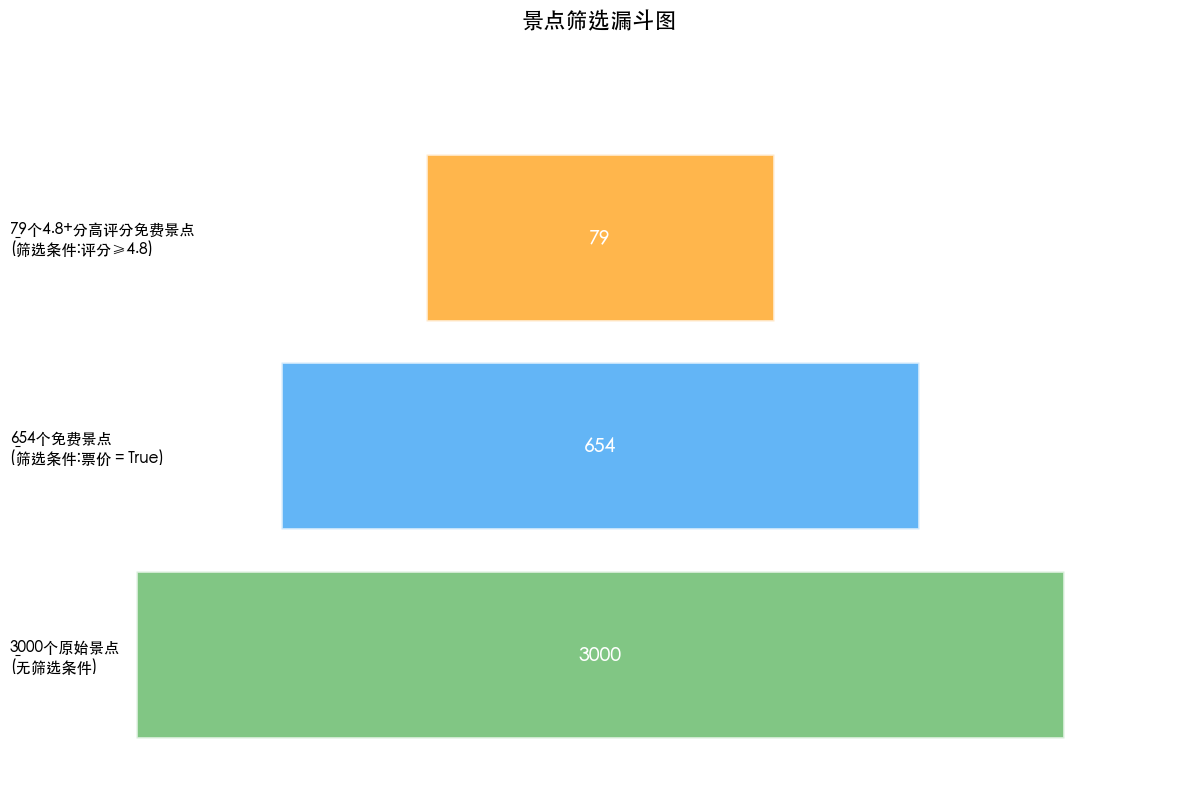

In [29]:
plt.figure(figsize=(12, 8))
funnel_labels = [
    f'{total_attractions}个原始景点\n(无筛选条件)',
    f'{free_attractions_count}个免费景点\n(筛选条件:票价 = {free_indicator})',
    f'{high_score_free}个4.8+分高评分免费景点\n(筛选条件:评分≥4.8)'
]
funnel_values = [total_attractions, free_attractions_count, high_score_free]
colors_funnel = ['#4CAF50', '#2196F3', '#FF9800']

max_width, min_width = 0.8, 0.3
widths = np.linspace(max_width, min_width, len(funnel_values))
y_positions = np.arange(len(funnel_values))

for i, (value, width, color) in enumerate(zip(funnel_values, widths, colors_funnel)):
    rect = plt.Rectangle((0.5 - width/2, i), width, 0.8, facecolor=color, alpha=0.7, edgecolor='white', linewidth=2)
    plt.gca().add_patch(rect)
    plt.text(0.5, i + 0.4, str(value), ha='center', va='center', fontsize=14, fontweight='bold', color='white')

plt.yticks(y_positions + 0.4, funnel_labels, fontsize=11, ha='left')
plt.gca().set_ylim(-0.2, len(funnel_values) + 0.2)
plt.gca().set_xlim(0, 1)
plt.gca().set_xticks([])
for spine in plt.gca().spines.values():
    spine.set_visible(False)

plt.title('景点筛选漏斗图', fontsize=16, fontweight='bold', pad=30)
plt.tight_layout()
plt.savefig('景点筛选漏斗图.png', dpi=300, bbox_inches='tight')
plt.show()